# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [61]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [65]:
# Crie 2 faixas de Latitude do município
sinasc_raw['FaixaLatitude'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')

# Aplique o groupby usando as faixas de Latitude como chave e realize as operações
estatisticas_latitude = sinasc_raw.groupby('FaixaLatitude').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

# Exibir o resultado
print(estatisticas_latitude)


     FaixaLatitude      PESO                                              \
                         sum         mean  min   max  median         std   
0  Abaixo de -10.5  42101809  3240.096121  258  5985  3270.0  531.794694   
1   Acima de -10.5  45555148  3246.055864  295  5190  3275.0  556.487709   

                    APGAR1                                                  
             var       sum      mean  min   max median       std       var  
0  282805.596163  104599.0  8.070288  0.0  10.0    8.0  0.960765  0.923069  
1  309678.570242  114559.0  8.199771  0.0  10.0    8.0  1.002839  1.005686  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [68]:
# Criar faixas de área dos municípios
sinasc_raw['FaixaArea'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')

# Aplicar o groupby usando as faixas de área como chave e realizar as operações
estatisticas_area = sinasc_raw.groupby('FaixaArea').agg({
    'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'MESPRENAT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

# Exibir o resultado
print(estatisticas_area)


        FaixaArea    APGAR5                                                  \
                        sum      mean  min   max median       std       var   
0  Abaixo de 3000   47570.0  9.130518  0.0  10.0    9.0  0.801138  0.641821   
1   Acima de 3000  199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299   

  MESPRENAT                                                    
        sum      mean  min   max median        std        var  
0   19206.0  3.820569  1.0  99.0    2.0  12.092759  146.23481  
1  177209.0  9.261472  1.0  99.0    2.0  24.587188  604.52981  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [71]:
# Ignorar avisos futuros do pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Criar faixas na variável munResAlt
sinasc_raw['FaixaAltitude'] = pd.cut(sinasc_raw['munResAlt'], bins=[-np.inf, 200, 400, 600, np.inf], labels=['<=200', '201-400', '401-600', '>600'])

# Aplicar o groupby usando as faixas de altitude como chave e realizar as operações
estatisticas_altitude = sinasc_raw.groupby('FaixaAltitude').agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

# Exibir o resultado
print(estatisticas_altitude)


  FaixaAltitude QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
0         <=200    21006.0  1.086255  0.0  14.0    1.0  1.195139  1.428356   
1       201-400     4166.0  0.964799  0.0  30.0    1.0  1.104317  1.219516   
2       401-600     1654.0  0.919911  0.0  10.0    1.0  1.034859  1.070933   
3          >600        0.0       NaN  NaN   NaN    NaN       NaN       NaN   

  QTDFILMORT                                                  
         sum      mean  min   max median       std       var  
0     5169.0  0.274276  0.0   9.0    0.0  0.603838  0.364620  
1     1021.0  0.238162  0.0   4.0    0.0  0.538711  0.290209  
2      453.0  0.252227  0.0  28.0    0.0  0.842711  0.710162  
3        0.0       NaN  NaN   NaN    NaN       NaN       NaN  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


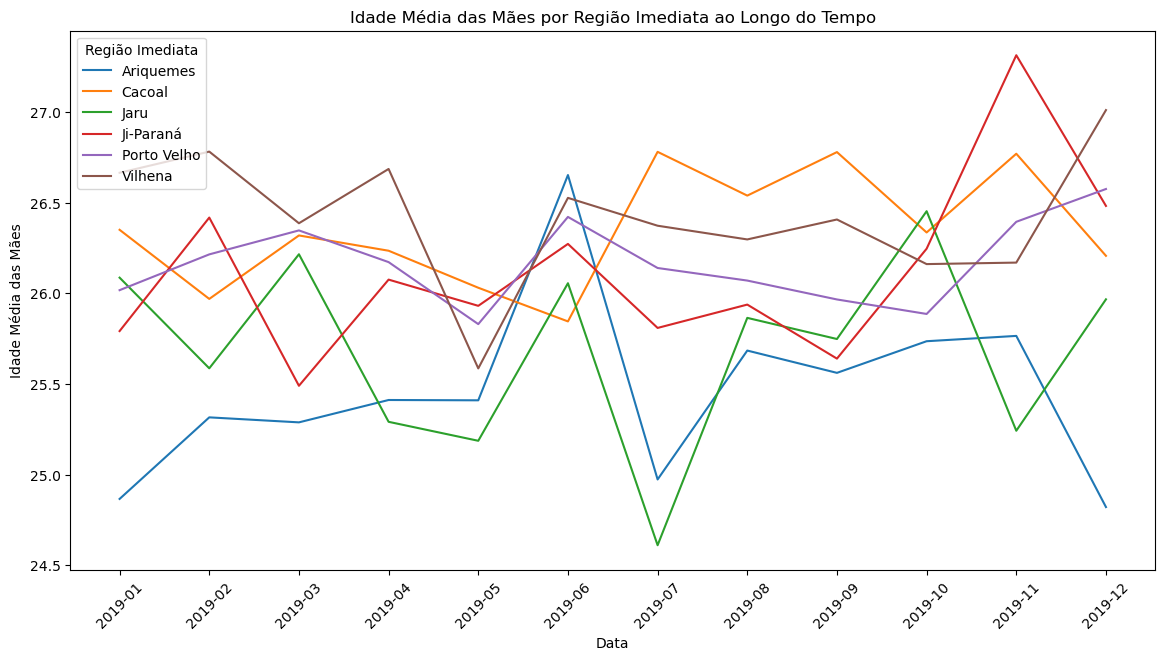

In [74]:
# Mapear municípios para regiões imediatas
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

# Adicionar coluna de região imediata ao DataFrame
sinasc_raw['RegiaoImediata'] = sinasc_raw['munResNome'].map(imediatas)

# Converter coluna de data para datetime e extrair ano-mês
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')
sinasc_raw['AnoMes'] = sinasc_raw['DTNASC'].dt.to_period('M').astype(str)

# Calcular a idade média das mães por região imediata e por mês
idade_media_regiao = sinasc_raw.groupby(['RegiaoImediata', 'AnoMes'])['IDADEMAE'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=idade_media_regiao, x='AnoMes', y='IDADEMAE', hue='RegiaoImediata')
plt.title('Idade Média das Mães por Região Imediata ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata')
plt.xticks(rotation=45)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [78]:
# Mapeamento de municípios para faixas de IDH-M
idh_mapping = {
    "Porto Velho": "Alto",
    "Vilhena": "Alto",
    "Cacoal": "Alto",
    "Ji-Paraná": "Alto",
    "Pimenta Bueno": "Alto",
    "Ariquemes": "Alto",
    "Rolim de Moura": "Alto",
    "Cerejeiras": "Médio",
    "Jaru": "Médio",
    "Colorado do Oeste": "Médio",
    # Adicionar os outros municípios do print aqui
    "Seringueiras": "Baixo",
    "Governador Jorge Teixeira": "Baixo",
    "Machadinho d'Oeste": "Baixo",
    # Adicionar os outros municípios do print aqui
}

# Adicionar coluna de faixa de IDH ao DataFrame
sinasc_raw['FaixaIDH'] = sinasc_raw['munResNome'].map(idh_mapping)

# Verificar as primeiras linhas para garantir que as faixas foram mapeadas corretamente
print(sinasc_raw[['munResNome', 'FaixaIDH']].head())


# Aplicar o groupby usando as faixas de IDH como chave e realizar as operações
estatisticas_idh = sinasc_raw.groupby('FaixaIDH').agg({
    'IDADEMAE': ['mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

# Exibir o resultado
print(estatisticas_idh)


                munResNome FaixaIDH
0    Alta Floresta D'Oeste      NaN
1    Alta Floresta D'Oeste      NaN
2    Alta Floresta D'Oeste      NaN
3  Alto Alegre dos Parecis      NaN
4    Alta Floresta D'Oeste      NaN
  FaixaIDH   IDADEMAE                                             PESO        \
                 mean min max median       std        var         mean   min   
0     Alto  26.280332  12  47   26.0  6.415374  41.157021  3245.623791   292   
1    Baixo  24.707143  13  42   24.0  5.915167  34.989196  3269.082143  1140   
2    Médio  26.466967  12  53   26.0  6.298697  39.673589  3250.869369   258   

                                            
    max  median         std            var  
0  5720  3275.0  552.210169  304936.070574  
1  4700  3287.5  484.785343  235016.828354  
2  5190  3269.0  552.990244  305798.209820  


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [81]:
# Mapeamento de municípios para faixas de IFDM
ifdm_mapping = {
    "Ariquemes": "Alto",
    "Vilhena": "Alto",
    "Pimenta Bueno": "Alto",
    "Porto Velho": "Moderado",
    "Ji-Paraná": "Moderado",
    "Cacoal": "Moderado",
    "Santa Luzia d'Oeste": "Regular",
    "Rolim de Moura": "Regular",
    "Chupinguaia": "Regular",
    "Governador Jorge Teixeira": "Baixo",
    # Adicionar os outros municípios do print aqui
}

# Adicionar coluna de faixa de IFDM ao DataFrame
sinasc_raw['FaixaIFDM'] = sinasc_raw['munResNome'].map(ifdm_mapping)

# Verificar as primeiras linhas para garantir que as faixas foram mapeadas corretamente
print(sinasc_raw[['munResNome', 'FaixaIFDM']].head())

# Aplicar o groupby usando as faixas de IFDM como chave e realizar as operações
estatisticas_ifdm = sinasc_raw.groupby('FaixaIFDM').agg({
    'IDADEMAE': ['mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

# Exibir o resultado
print(estatisticas_ifdm)


                munResNome FaixaIFDM
0    Alta Floresta D'Oeste       NaN
1    Alta Floresta D'Oeste       NaN
2    Alta Floresta D'Oeste       NaN
3  Alto Alegre dos Parecis       NaN
4    Alta Floresta D'Oeste       NaN
  FaixaIFDM   IDADEMAE                                             PESO        \
                  mean min max median       std        var         mean   min   
0      Alto  25.877764  13  47   25.0  6.251471  39.080886  3251.295807   345   
1     Baixo  24.401786  13  41   24.0  5.698838  32.476754  3238.991071  1930   
2  Moderado  26.387643  12  47   26.0  6.463752  41.780091  3245.477028   292   
3   Regular  26.412305  13  44   26.0  6.428472  41.325253  3237.425161   690   

                                            
    max  median         std            var  
0  4985  3280.0  524.348924  274941.794530  
1  4140  3217.5  439.369050  193045.162082  
2  5480  3275.0  563.419908  317441.992322  
3  5720  3275.0  517.075705  267367.285065  


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [84]:
# Mapeamento de municípios para faixas de PIB
pib_mapping = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão do Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 100 Milhões",
    "Alto Alegre dos Parecis": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 100 Milhões",
    "Alvorada do Oeste": "Acima de 100 Milhões",
    "Chupinguaia": "Até 100 Milhões",
    "Corumbiara": "Até 100 Milhões",
    "Ministro Andreazza": "Até 100 Milhões"
}

# Adicionar coluna de faixa de PIB ao DataFrame
sinasc_raw['FaixaPIB'] = sinasc_raw['munResNome'].map(pib_mapping)

# Verificar as primeiras linhas para garantir que as faixas foram mapeadas corretamente
print(sinasc_raw[['munResNome', 'FaixaPIB']].head())



# Aplicar o groupby usando as faixas de PIB como chave e realizar as operações
estatisticas_pib = sinasc_raw.groupby('FaixaPIB').agg({
    'IDADEMAE': ['mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

# Exibir o resultado
print(estatisticas_pib)


                munResNome              FaixaPIB
0    Alta Floresta D'Oeste                   NaN
1    Alta Floresta D'Oeste                   NaN
2    Alta Floresta D'Oeste                   NaN
3  Alto Alegre dos Parecis  Acima de 100 Milhões
4    Alta Floresta D'Oeste                   NaN
               FaixaPIB   IDADEMAE                                      \
                              mean min max median       std        var   
0     Acima de 1 Bilhão  26.265562  12  47   26.0  6.403777  41.008357   
1  Acima de 100 Milhões  25.146435  13  41   25.0  5.905771  34.878129   
2  Acima de 300 Milhões  25.706070  11  47   25.0  6.344987  40.258860   
3  Acima de 500 Milhões  25.785927  13  53   25.0  6.479551  41.984580   
4       Até 100 Milhões  25.702413  13  44   25.0  6.283612  39.483784   

          PESO                                                
          mean  min   max  median         std            var  
0  3247.215719  292  5720  3275.0  550.349000  302884.021802 

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Atividade 5.1: IDH
Insight Principal: Municípios com IDH alto tendem a ter mães com idade média um pouco maior em comparação com municípios de IDH médio e baixo. O peso médio dos bebês é consistente entre as faixas de IDH.

Atividade 5.2: IFDM
Insight Principal: Semelhante ao IDH, municípios com IFDM alto tendem a ter mães mais velhas. O peso dos bebês não varia significativamente entre diferentes faixas de IFDM.

Atividade 5.3: PIB
Insight Principal: Municípios com PIB mais alto tendem a ter mães com idade média ligeiramente maior. O peso dos bebês é consistente através das faixas de PIB, sugerindo que os cuidados de saúde são uniformes.

Insights Gerais
Idade Média das Mães e Desenvolvimento:

A idade média das mães tende a ser maior em municípios com melhores indicadores de desenvolvimento, sugerindo maior acesso à educação e oportunidades econômicas.

Peso dos Bebês e Indicadores Socioeconômicos:

O peso dos bebês ao nascer é consistente entre diferentes faixas de IDH, IFDM e PIB, indicando um nível uniforme de cuidados de saúde maternal e infantil.

Impacto do Desenvolvimento Econômico:

Municípios com maiores PIBs e melhores indicadores de desenvolvimento mostram mães que tendem a ser mais velhas, indicando mais recursos e suporte para planejamento familiar.

Esses insights destacam a importância de analisar múltiplos indicadores de desenvolvimento para compreender as questões de saúde e demografia em Rondônia.